In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

plt.style.use("seaborn-poster")

In [2]:
n = 10000
Days_list = (-3,-2,-1,0)
init=1

path = "results/"+str(n)+"allpc_days_"
df = pd.DataFrame()

for days in ("-3","-2","-1","0"):
    for detect in ("0.1","0.3","0.05"):
        for gens in ("1","2"):
            for file in glob.glob(path+"*"+days+"init_2_detect"+"*"+detect+"_gens"+"*"+gens+".csv"):
                temp = pd.read_csv(file)
                #temp['detect'] = float(detect)
                temp['N_Gens'] = int(gens)
                df = df.append(temp)
df.pc = ["$%s$" % x for x in df.pc]
df.DAYS = df.DAYS.astype(int)
df.head()

#df.N_Gens.unique()


,DAYS,actual_gen_times_mean,avg_daily_growth_rate,cases,detect,die_out,pc,secondary_cases_25,secondary_cases_75,secondary_cases_mean,sim,N_Gens
0,-3,3.516249,1.052689,56,0.1,True,$1.0$,0.0,0.0,1.147373,0,1
1,-3,3.516249,1.000000,12,0.1,True,$1.0$,0.0,0.0,1.147373,1,1
2,-3,3.516249,1.087594,149,0.1,False,$1.0$,0.0,0.0,1.147373,2,1
3,-3,3.516249,1.041806,41,0.1,True,$1.0$,0.0,0.0,1.147373,3,1
4,-3,3.516249,1.000000,12,0.1,True,$1.0$,0.0,0.0,1.147373,4,1


,DAYS,pc,N_Gens,die_out
1,-3,$0.5$,2,0.7097
3,-3,$0.75$,2,0.7330
5,-3,$0.9$,2,0.7461
7,-3,$1.0$,2,0.7594
9,-2,$0.5$,2,0.6966
11,-2,$0.75$,2,0.7214
13,-2,$0.9$,2,0.7278
15,-2,$1.0$,2,0.7422
0,-3,$0.5$,1,0.7012
2,-3,$0.75$,1,0.7172


8     0.6930
10    0.7086
12    0.7153
14    0.7241
Name: die_out, dtype: float64

,DAYS,pc,N_Gens,die_out,Baseline,Improvement,Scenario
1,-3,$0.5$,2,0.7097,0.6930,0.0167,"Days =-3, N_Gens=2"
3,-3,$0.75$,2,0.7330,0.7086,0.0244,"Days =-3, N_Gens=2"
5,-3,$0.9$,2,0.7461,0.7153,0.0308,"Days =-3, N_Gens=2"
7,-3,$1.0$,2,0.7594,0.7241,0.0353,"Days =-3, N_Gens=2"
9,-2,$0.5$,2,0.6966,0.6930,0.0036,"Days =-2, N_Gens=2"
11,-2,$0.75$,2,0.7214,0.7086,0.0128,"Days =-2, N_Gens=2"
13,-2,$0.9$,2,0.7278,0.7153,0.0125,"Days =-2, N_Gens=2"
15,-2,$1.0$,2,0.7422,0.7241,0.0181,"Days =-2, N_Gens=2"
0,-3,$0.5$,1,0.7012,0.6930,0.0082,"Days =-3, N_Gens=1"
2,-3,$0.75$,1,0.7172,0.7086,0.0086,"Days =-3, N_Gens=1"


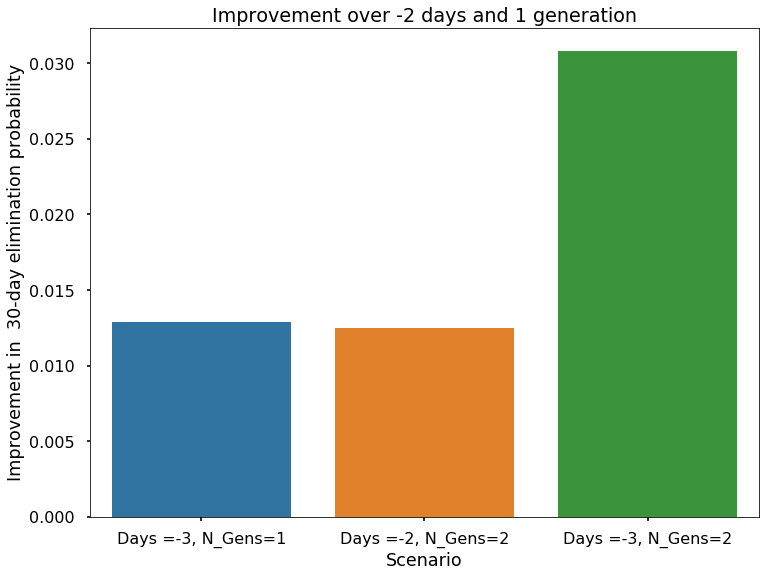

In [4]:
# Plot for detect = 0.3

detect = 0.3

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.3
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
display(mean_col)
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
display(baseline_probs)
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
#print(mean_col)

mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
#print(mean_col)


mean_col = mean_col.loc[mean_col.Scenario!='Days =-2, N_Gens=1']

display(mean_col)
# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3, N_Gens=1", "Days =-2, N_Gens=2", "Days =-3, N_Gens=2"],
            y='Improvement',
            data=mean_col.loc[mean_col.pc=="$0.9$"],
            #hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement over -2 days and 1 generation")
plt.show()

    DAYS      pc  N_Gens  die_out  Baseline  Improvement
1     -3   $0.5$       2   0.6829    0.6752       0.0077
3     -3  $0.75$       2   0.6974    0.6772       0.0202
5     -3   $0.9$       2   0.7107    0.6850       0.0257
7     -3   $1.0$       2   0.7191    0.6907       0.0284
9     -2   $0.5$       2   0.6726    0.6752      -0.0026
11    -2  $0.75$       2   0.6858    0.6772       0.0086
13    -2   $0.9$       2   0.6969    0.6850       0.0119
15    -2   $1.0$       2   0.7009    0.6907       0.0102
0     -3   $0.5$       1   0.6778    0.6752       0.0026
2     -3  $0.75$       1   0.6855    0.6772       0.0083
4     -3   $0.9$       1   0.6967    0.6850       0.0117
6     -3   $1.0$       1   0.7004    0.6907       0.0097
8     -2   $0.5$       1   0.6752    0.6752       0.0000
10    -2  $0.75$       1   0.6772    0.6772       0.0000
12    -2   $0.9$       1   0.6850    0.6850       0.0000
14    -2   $1.0$       1   0.6907    0.6907       0.0000
    DAYS      pc  N_Gens  die_o

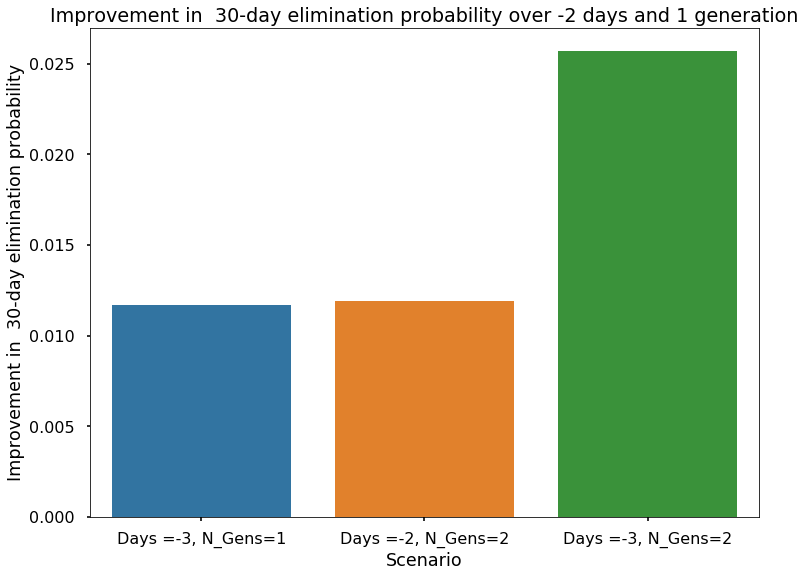

In [5]:
# Plot for detect = 0.1

detect = 0.1

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.1
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
print(mean_col)


mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
print(mean_col)

mean_col = mean_col.loc[mean_col.Scenario!='Days =-2, N_Gens=1']


# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3, N_Gens=1", "Days =-2, N_Gens=2", "Days =-3, N_Gens=2"],
            y='Improvement',
            data=mean_col.loc[mean_col.pc=="$0.9$"],
            #hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement in  30-day elimination probability over -2 days and 1 generation")
plt.show()


    DAYS      pc  N_Gens  die_out  Baseline  Improvement
1     -3   $0.5$       2   0.6795    0.6686       0.0109
3     -3  $0.75$       2   0.6934    0.6731       0.0203
5     -3   $0.9$       2   0.7053    0.6762       0.0291
7     -3   $1.0$       2   0.7167    0.6873       0.0294
9     -2   $0.5$       2   0.6696    0.6686       0.0010
11    -2  $0.75$       2   0.6812    0.6731       0.0081
13    -2   $0.9$       2   0.6889    0.6762       0.0127
15    -2   $1.0$       2   0.6967    0.6873       0.0094
0     -3   $0.5$       1   0.6721    0.6686       0.0035
2     -3  $0.75$       1   0.6781    0.6731       0.0050
4     -3   $0.9$       1   0.6902    0.6762       0.0140
6     -3   $1.0$       1   0.6934    0.6873       0.0061
8     -2   $0.5$       1   0.6686    0.6686       0.0000
10    -2  $0.75$       1   0.6731    0.6731       0.0000
12    -2   $0.9$       1   0.6762    0.6762       0.0000
14    -2   $1.0$       1   0.6873    0.6873       0.0000
    DAYS      pc  N_Gens  die_o

Text(0.5, 1.0, 'Improvement in  30-day elimination probability over -2 days and 1 generation')

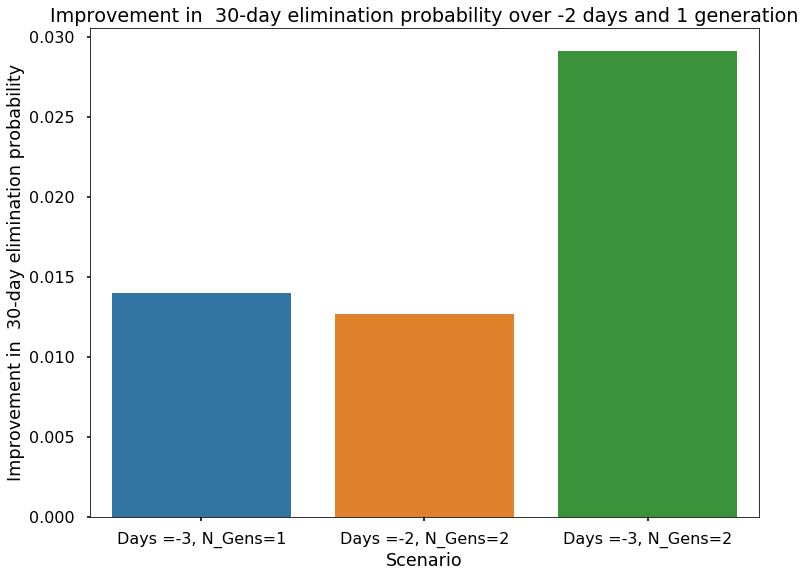

In [11]:
# Plot for detect = 0.1

detect = 0.05

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.1
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
print(mean_col)


mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
print(mean_col)

mean_col = mean_col.loc[mean_col.Scenario!='Days =-2, N_Gens=1']


# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3, N_Gens=1", "Days =-2, N_Gens=2", "Days =-3, N_Gens=2"],
            y='Improvement',
            data=mean_col.loc[mean_col.pc=='$0.9$'],
            #hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement in  30-day elimination probability over -2 days and 1 generation")
